# Convolutional PDEs

Initial [wave equation](https://en.wikipedia.org/wiki/Wave_equation#Introduction):

$$\frac{{\partial ^2 u}}{{\partial t^2 }} = {{c^2 \Delta u}}$$

discrete equations for $u$ with a discret time interval $\delta t$

$$
\begin{align} 
 u_0(x,y) &= C\\
 u_{n+1}(x,y) &= u_n(x,y) + u'_n(x,y) \delta t\\
 u'_{n+1}(x,y) &= u'_n(x,y) + u''_n(x,y) \delta t\\
\end{align}
$$

substituting $u''_n(x,y)$ with the RHS of the wave equation $c^2 \Delta u $

$$
\begin{align}
 u_0(x,y) &= C\\
 u_{n+1}(x,y) &= u_n(x,y) + u'_n(x,y) \delta t\\
 u'_{n+1}(x,y) &= u'_n(x,y) + (c^2 \Delta u ) \delta t\\
\end{align}
$$

Initial conditions:

In [1]:
%pylab inline
from scipy import signal

Populating the interactive namespace from numpy and matplotlib


In [2]:
N = 51
u_init = np.zeros([N, N], dtype=np.float32)
ut_init = np.zeros([N, N], dtype=np.float32)

# initial condition
u_init[N//2,N//2] = 10


In [3]:
LaPlace = [[0., 1., 0.],[1., -4., 1.],[0., 1., 0.]]

In [4]:
U_ = u_init
Ut_= ut_init
lU_= np.zeros_like(ut_init)
OrigStart = time.time()
for k in range(0,N-1):
    for i in range(1,u_init.shape[0]-2):
        for j in range(1,u_init.shape[1]-2):
            lU_[i+1,j+1] = np.sum(LaPlace*U_[i:i+3,j:j+3])/8.
    U_  = U_+ Ut_
    Ut_ = Ut_ + (1./4.*lU_)
OrigEnd = time.time()
OrigTime = OrigEnd-OrigStart
print("Time: " + str(OrigTime) + " seconds. Iterations: " + str(N-1))

Time: 6.08697772026062 seconds. Iterations: 50


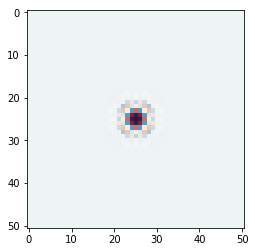

In [5]:
plt.imshow(U_,cmap='RdBu')

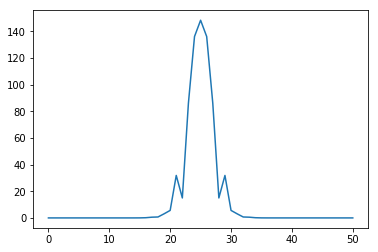

In [6]:
plt.plot(np.abs(U_[:,N//2]))

# Problem 1 - For Loop

In [7]:
U_ = u_init
Ut_= ut_init
lU_= np.zeros_like(ut_init)

OrigStart = time.time()

for k in range(0,N-1):
    lU_ = signal.convolve(U_,LaPlace,mode = 'same',method = 'direct')/8
    U_  = U_+ Ut_
    Ut_ = Ut_ + (1./4.*lU_)

OrigEnd = time.time()
OrigTime = OrigEnd-OrigStart
print("Time: " + str(OrigTime) + " seconds. Iterations: " + str(N-1))

Time: 0.14419102668762207 seconds. Iterations: 50


/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:491: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return x[reverse].conj()
/usr/lib/python3/dist-packages/scipy/signal/signaltools.py:251: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  in1zpadded[sc] = in1.copy()


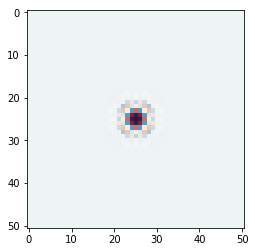

In [8]:
plt.imshow(U_,cmap='RdBu')

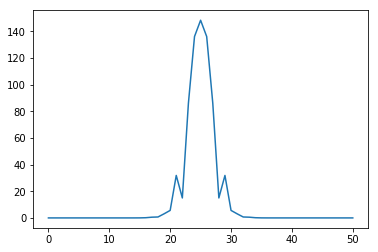

In [9]:
plt.plot(np.abs(U_[:,N//2]))

# Problem 1 - Recursion

In [10]:
def func(lU,Ut,U,LaPlace,i,N):
    if i == N:
        return lU,Ut,U
    else:
        lU = signal.convolve(U,LaPlace,mode = 'same',method = 'direct')/8
        U  = U+ Ut
        Ut = Ut + (1./4.*lU)
    return func(lU,Ut,U,LaPlace,i+1,N)

In [11]:
U_ = u_init
Ut_= ut_init
lU_= np.zeros_like(ut_init)

OrigStart = time.time()

lU_,Ut_,U_ = func(lU_,Ut_,U_,LaPlace,0,N-1)

OrigEnd = time.time()
OrigTime = OrigEnd-OrigStart
print("Time: " + str(OrigTime) + " seconds. Iterations: " + str(N-1))

Time: 0.1420142650604248 seconds. Iterations: 50


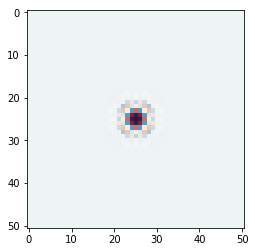

In [12]:
plt.imshow(U_,cmap='RdBu')

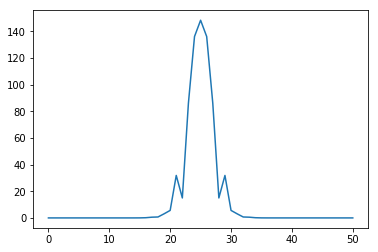

In [13]:
plt.plot(np.abs(U_[:,N//2]))